# Full Experiment Aquisition

In [1]:
import ximea_cam_aquire_save as aquire
import run_experiment as runexp
import run_analysis as runana

import imp
import numpy as np
import matplotlib.pyplot as plt
import imageio
import cv2
import schedule
import time

In [2]:
#settings
subject = 'test_subject'
task = 'test_task'
exp = 'exp'
capture_dir = './capture'
analysis_dir = './analysis'
frames = 50

In [3]:
imp.reload(runexp)
imp.reload(aquire)
runexp.run_experiment(subject_name=subject, 
                      task_name=task, 
                      exp_type=exp,
                      save_dir=capture_dir,
                      max_frames=frames)

Running an experiment.
Started eyetracking aquisition at 200fps...
Started imu aquisition at 200fps...
Starting scene aquisition at 200fps...
Setting cam exposure to 5.0 ms
Saving Queue Started...
Saving Queue Started...
Saving Queue Started...
Finished PupilLabs Aquisition.
Finished Realsense Aquisition.
**************************************************Sampled to max num frames of 50
Cleanly Stopping Device Aquisition and closing file.
Writing Queue of Timestamps...
Waiting for save threads/queues to finish...
Finished Ximea Aquisition.


()

Running Frame Analysis...
Mean camera time disparity: 0.0111 seconds
Mean OS dts: 0.0160 seconds
Mean OD dts: 0.0163 seconds
Mean CY dts: 0.0163 seconds


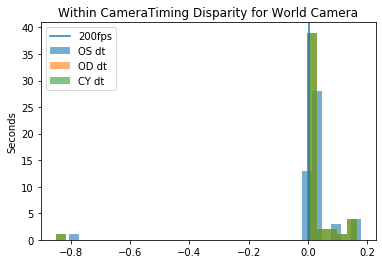

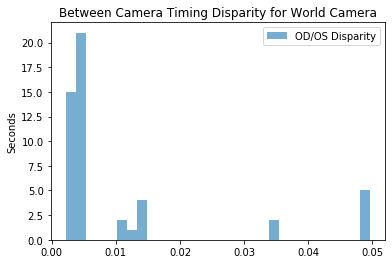

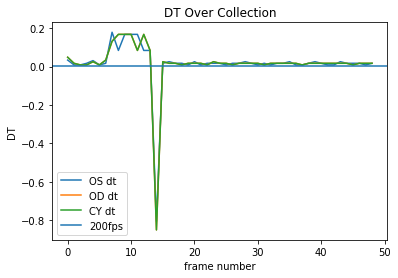

Waiting for frame conversions...
******************************************************************************************************************************************************Done with frame conversions.
Finished Anaysis!


In [17]:
imp.reload(runana)
runana.run_analysis(subject_name=subject, 
                      task_name=task, 
                      exp_type=exp,
                      read_dir=capture_dir,
                      save_dir=analysis_dir,
                      run_timestamp_stats=True,
                      run_convert_ims=True
                      )

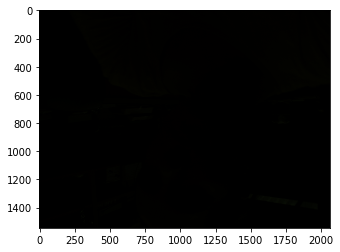

(array([8.73503e+06, 5.53879e+05, 2.47348e+05, 1.01280e+04, 9.11800e+03,
        2.38900e+03, 2.05500e+03, 3.45000e+02, 1.34000e+02, 2.20000e+01]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <a list of 10 Patch objects>)

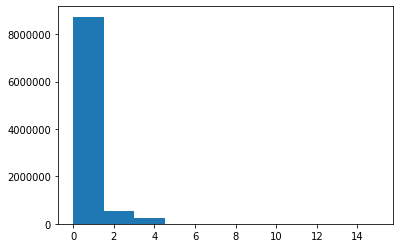

In [5]:
im = cv2.imread('./analysis/test_subject/test_task/exp/scene_camera/cam_od/frame_0.png')
plt.imshow(im)
plt.show()
plt.hist(im.flatten())

In [12]:
f= 'capture/test_subject/test_task/exp/scene_camera/cam_od/frame_0.bin'
a = []
with open(f, 'rb') as fn:
    bss = fn.read(2)
    while(bss):
        bss = fn.read(1)
        bbs = fn.read(1)
        bs = int.from_bytes(bss,'big')
        bb = int.from_bytes(bbs,'big')
        s = 256*bb+bs
        a.append(s)
a = np.array(a)

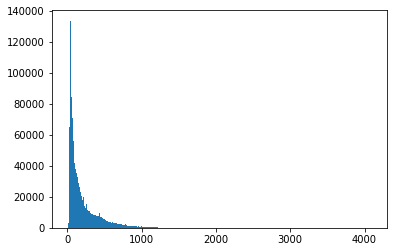

In [11]:
plt.hist(np.array(a).flatten(), bins=1000);

In [15]:
im = a.reshape((1544,2064))
imc = cv2.cvtColor(np.uint16(im), cv2.COLOR_BayerGR2RGB)

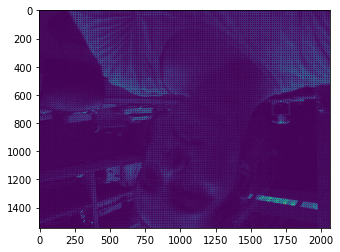

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


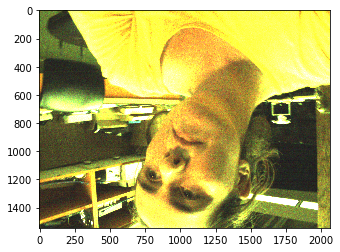

In [16]:
plt.imshow(im)
plt.show()
plt.imshow(imc)
plt.show()
